# Examination of Poverty Dynamics through Data Visualization

In [1]:
import json
import pprint
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from fuzzywuzzy import fuzz

D:\PROJECTS\poverty_data\venv\Lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


## Reading the required datasets:

In [2]:
dist_data = pd.read_csv(r'datasets/pca-total.csv')
dist_data_columns = pd.read_csv(r'datasets/pca-colnames.csv')
literacy = pd.read_csv(r'datasets/Literacy Data 2011.csv')
crimes = pd.read_csv(r'datasets/01_District_wise_crimes_committed_IPC_2001_2012.csv')
dist_data_other = pd.read_csv(r'datasets/india-districts-census-2011.csv')

## Preprocessing the data:

Merging the datasets into one dataset.

In [3]:
dist_data.head(50)

,State,District,Level,Name,TRU,TRU1,No_HH,TOT_P,TOT_M,TOT_F,...,MARG_AL_0_3_F,MARG_HH_0_3_P,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_P,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_P,NON_WORK_M,NON_WORK_F
0,1,1,DISTRICT,Kupwara,Total,2379.0,113929,870354,474190,396164,...,1955,1216,597,619,7369,4727,2642,641290,283291,357999
1,1,2,DISTRICT,Badgam,Total,1361.0,103363,753745,398041,355704,...,2035,3823,1148,2675,4674,2393,2281,538879,235463,303416
2,1,3,DISTRICT,Leh(Ladakh),Total,45110.0,21909,133487,78971,54516,...,106,65,17,48,633,416,217,58408,25706,32702
3,1,4,DISTRICT,Kargil,Total,14036.0,18338,140802,77785,63017,...,521,263,93,170,3887,2920,967,88929,37946,50983
4,1,5,DISTRICT,Punch,Total,1674.0,90261,476835,251899,224936,...,2035,948,243,705,6374,2762,3612,315442,134222,181220
5,1,6,DISTRICT,Rajouri,Total,2630.0,130401,642415,345351,297064,...,2424,861,217,644,15078,4583,10495,351503,160599,190904
6,1,7,DISTRICT,Kathua,Total,2502.0,119583,616435,326109,290326,...,887,325,161,164,4444,3410,1034,416004,164561,251443
7,1,8,DISTRICT,Baramula,Total,4243.0,152635,1008039,534733,473306,...,3141,1701,787,914,6955,4606,2349,703839,285152,418687
8,1,9,DISTRICT,Bandipore,Total,345.0,58392,392232,207680,184552,...,3773,2472,664,1808,5579,2160,3419,242915,106300,136615
9,1,10,DISTRICT,Srinagar,Total,1979.0,191678,1236829,651124,585705,...,274,2070,305,1765,5706,3711,1995,829641,317973,511668


In [4]:
dist_data_other

,District code,State name,District name,Population,Male,Female,Literate,Male_Literate,Female_Literate,SC,...,Power_Parity_Rs_90000_150000,Power_Parity_Rs_45000_150000,Power_Parity_Rs_150000_240000,Power_Parity_Rs_240000_330000,Power_Parity_Rs_150000_330000,Power_Parity_Rs_330000_425000,Power_Parity_Rs_425000_545000,Power_Parity_Rs_330000_545000,Power_Parity_Above_Rs_545000,Total_Power_Parity
0,1,JAMMU AND KASHMIR,Kupwara,870354,474190,396164,439654,282823,156831,1048,...,94,588,71,101,172,74,10,84,15,1119
1,2,JAMMU AND KASHMIR,Badgam,753745,398041,355704,335649,207741,127908,368,...,126,562,72,89,161,96,28,124,18,1066
2,3,JAMMU AND KASHMIR,Leh(Ladakh),133487,78971,54516,93770,62834,30936,488,...,46,122,15,22,37,20,14,34,17,242
3,4,JAMMU AND KASHMIR,Kargil,140802,77785,63017,86236,56301,29935,18,...,27,114,12,18,30,19,3,22,7,214
4,5,JAMMU AND KASHMIR,Punch,476835,251899,224936,261724,163333,98391,556,...,78,346,35,50,85,59,8,67,12,629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,636,PONDICHERRY,Mahe,41816,19143,22673,36470,16610,19860,144,...,2316,4309,1370,838,2208,576,978,1554,1446,10027
636,637,PONDICHERRY,Karaikal,200222,97809,102413,154916,79903,75013,35348,...,1063,2408,665,340,1005,246,483,729,341,4890
637,638,ANDAMAN AND NICOBAR ISLANDS,Nicobars,36842,20727,16115,25332,15397,9935,0,...,685,1895,212,134,346,70,120,190,84,3151
638,639,ANDAMAN AND NICOBAR ISLANDS,North AND Middle Andaman,105597,54861,50736,78683,43186,35497,0,...,685,1895,212,134,346,70,120,190,84,3151


In [5]:
dist_data_cleaned = dist_data[['State','District','Name','TRU1','No_HH','TOT_P','TOT_M','TOT_F','P_LIT','M_LIT','F_LIT','P_ILL','M_ILL','F_ILL','TOT_WORK_P','TOT_WORK_M','TOT_WORK_F','NON_WORK_P','NON_WORK_M','NON_WORK_F']]

dist_data_other_cleaned = dist_data_other[['State name','District code','District name','ST','SC','Hindus','Muslims','Sikhs','Buddhists','Jains','Others_Religions','Religion_Not_Stated','Households','Rural_Households','Urban_Households','Households_with_Internet']]

df = pd.merge(dist_data_cleaned,dist_data_other_cleaned,left_on='District',right_on='District code',how='inner').drop(['District code','District name', 'State', 'District'],axis=1)

In [6]:
df.insert(0, 'State name', df.pop('State name'))

In [7]:
col = df.columns.tolist()

col = ['State', 'District',
 'Area (sq km)',
 'Households',
 'Total Population',
 'Total Males',
 'Total Females',
 'Literate Population',
 'Literate Males',
 'Literate Females',
 'Illiterate Population',
 'Males Illiterates',
 'Female Illiterates',
 'Total Working Population',
 'Total Working Males',
 'Total Working Females',
 'Unemployed Population',
 'Unemployed Males',
 'Unemployed Females',
 'ST',
 'SC',
 'Hindus',
 'Muslims',
 'Sikhs',
 'Buddhists',
 'Jains',
 'Others_Religions',
 'Religion_Not_Stated',
 'Households',
 'Rural_Households',
 'Urban_Households',
 'Households_with_Internet']

df.columns = col

In [8]:
df = df.reset_index(drop=True)
df

,State,District,Area (sq km),Households,Total Population,Total Males,Total Females,Literate Population,Literate Males,Literate Females,...,Muslims,Sikhs,Buddhists,Jains,Others_Religions,Religion_Not_Stated,Households,Rural_Households,Urban_Households,Households_with_Internet
0,JAMMU AND KASHMIR,Kupwara,2379.0,113929,870354,474190,396164,439654,282823,156831,...,823286,5600,66,39,13,2522,181664,158438,23226,762
1,JAMMU AND KASHMIR,Badgam,1361.0,103363,753745,398041,355704,335649,207741,127908,...,736054,5559,47,6,2,478,187839,160649,27190,1999
2,JAMMU AND KASHMIR,Leh(Ladakh),45110.0,21909,133487,78971,54516,93770,62834,30936,...,19057,1092,88635,103,54,1006,54394,36920,17474,574
3,JAMMU AND KASHMIR,Kargil,14036.0,18338,140802,77785,63017,86236,56301,29935,...,108239,1171,20126,28,4,289,48144,40370,7774,235
4,JAMMU AND KASHMIR,Punch,1674.0,90261,476835,251899,224936,261724,163333,98391,...,431279,11188,83,10,2,711,147408,132139,15269,346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,PONDICHERRY,Mahe,9.0,7420,41816,19143,22673,36470,16610,19860,...,12856,3,21,14,3,21,12110,0,12110,574
636,PONDICHERRY,Karaikal,157.0,49705,200222,97809,102413,154916,79903,75013,...,28835,46,63,54,14,181,69333,35618,33715,1868
637,ANDAMAN AND NICOBAR ISLANDS,Nicobars,1841.0,9288,36842,20727,16115,25332,15397,9935,...,1336,343,119,0,248,38,15958,15958,0,57
638,ANDAMAN AND NICOBAR ISLANDS,North & Middle Andaman,3736.0,26199,105597,54861,50736,78683,43186,35497,...,2165,77,84,4,47,187,40185,39091,1094,388


In [28]:
df.loc[df['District'] == 'Kargil','State']

3    JAMMU AND KASHMIR
Name: State, dtype: object

## Districts with highest HCR (head-count ratio) for persons in poverty are:
 
 - Malkangiri  
 - Nabagangapur
 - Rayagada
 - Koraput
 - Nuapada
 
According to study:
(https://www.researchgate.net/figure/The-100-Districts-in-India-with-the-Highest-Poverty-Rates_tbl2_40771948)

In [9]:
poor_districts = ['Malkangiri', 'Nabarangapur', 'Rayagada', 'Koraput', 'Nuapada']
df_list = []
df_poor = pd.DataFrame()
for district in poor_districts:
  df_list.append(df.query(f'District == "{district}"')) 
  
df_poor = pd.concat(df_list)
df_poor

,State,District,Area (sq km),Households,Total Population,Total Males,Total Females,Literate Population,Literate Males,Literate Females,...,Muslims,Sikhs,Buddhists,Jains,Others_Religions,Religion_Not_Stated,Households,Rural_Households,Urban_Households,Households_with_Internet
398,ORISSA,Malkangiri,5791.0,137599,613192,303624,309568,244706,147001,97705,...,1871,213,43,195,35,577,183723,167884,15839,448
396,ORISSA,Nabarangapur,5291.0,273423,1220946,604812,616134,470379,286984,183395,...,6753,169,189,325,54,3299,372264,342840,29424,1324
395,ORISSA,Rayagada,7073.0,226144,967911,471960,495951,407735,241959,165776,...,4607,219,249,123,44,3308,286548,237343,49205,1553
397,ORISSA,Koraput,8807.0,337677,1379647,678809,700838,568090,340843,227247,...,8850,518,219,491,3384,3484,460128,381789,78339,3988
393,ORISSA,Nuapada,3852.0,152210,610382,301962,308420,299383,180903,118480,...,4952,724,76,905,22,833,209127,197258,11869,757


In [10]:
df_poor.index.values

array([398, 396, 395, 397, 393], dtype=int64)

In [2801]:
literacy_rates = []
employment_rates = []
pct_urban_households = []

for district in df_poor.index:
 
 literacy_rates.append(round(float(df_poor.loc[district]['Literate Population'] / df_poor.loc[district]['Total Population']) * 100,2)) 
 employment_rates.append(round(float(df_poor.loc[district]['Unemployed Population'] / df_poor.loc[district]['Total Population'])  * 100,2)) 
 pct_urban_households.append(round(float(df_poor.loc[district]['Urban_Households'] / df_poor.loc[district]['Households'][1])  * 100,2))

df_poor_plot = pd.DataFrame({'District': df_poor.index.values, 'Literacy Rates': literacy_rates, 'Employment Rates': employment_rates, "Percentage of Urban Households": pct_urban_households})
df_poor_plot

C:\Users\TAMIM\AppData\Local\Temp\ipykernel_11892\2849139382.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pct_urban_households.append(round(float(df_poor.loc[district]['Urban_Households'] / df_poor.loc[district]['Households'][1])  * 100,2))


,District,Literacy Rates,Employment Rates,Percentage of Urban Households
0,398,39.91,49.34,8.62
1,396,38.53,49.96,7.90
2,395,42.13,51.74,17.17
3,397,41.18,49.74,17.03
4,393,49.05,49.96,5.68


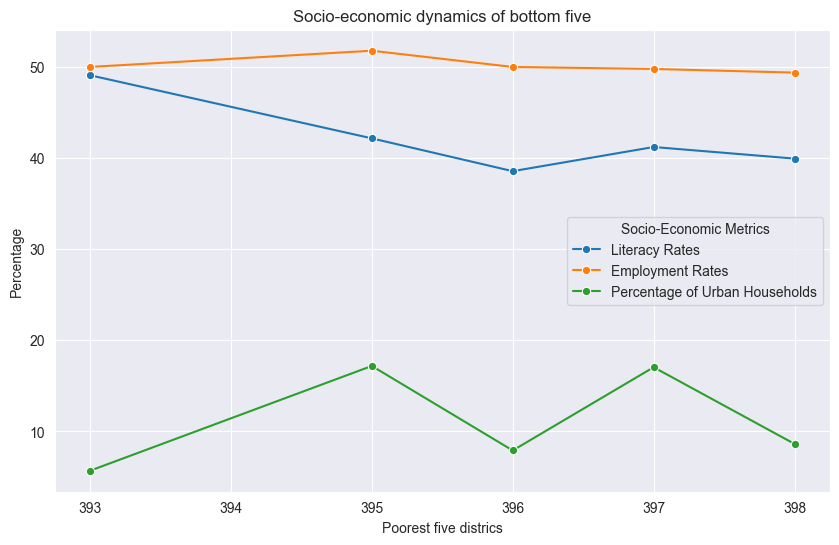

In [2802]:
df_poor_melted = pd.melt(df_poor_plot, id_vars=['District'], var_name='Metric', value_name='Percentage')
plt.figure(figsize=(10, 6))
sns.lineplot(x='District', y='Percentage', hue='Metric', marker='o', data=df_poor_melted)

plt.title('Socio-economic dynamics of bottom five')
plt.xlabel('Poorest five districs')
plt.ylabel('Percentage')
plt.legend(title='Socio-Economic Metrics')
plt.grid(True)
plt.show()

## Parsing the NITI Aayog Multidimensional Poverty Index Report

The data is found in the 2011 NITI Aayog NFHS survey, in a tabulated manner for each district. We must obtain the Head-Count Ratio for each district.

HCR: Percentage of population below the poverty line.

In [2803]:
!pip install pdfplumber pdfminer.six

In [2804]:
import pdfplumber

def extract_text_from_pdfplumber(pdf_path, page_num):
    
    with pdfplumber.open(pdf_path) as pdf:
        
        page = pdf.pages[page_num]
        text = page.extract_text()

    return text


In [2805]:
pdf_path = 'resources/India-National-Multidimentional-Poverty-Index-2023.pdf'
list_of_pages = [83, 91, 99, 107, 115, 121, 129, 137, 145, 153, 161, 169, 185, 193, 201, 209, 217, 225, 233, 241, 248, 255, 262, 268, 276, 283, 291, 297, 303, 309, 316, 323, 329, 335, 342]

In [2806]:
# start = 80
# end = 350
# 
# list_of_pages = []
# 
# for i in range(start,end):
#     extracted_text = extract_text_from_pdfplumber(pdf_path, i)
#     if extracted_text.__contains__('Overview of Districts'):
#         list_of_pages.append(i)
# 
# print(list_of_pages)

In [2807]:
# text = "\nTHIS IS THE END OF ONE PAGE\n"
# 
# with pdfplumber.open(pdf_path) as pdf:
#     for page in list_of_pages:
# 
#         page = pdf.pages[page]
# 
#         text = text + page.extract_text()
#         text = text + "\nTHIS IS THE END OF ONE PAGE\n"
# print(os.getcwd())
# with open('resources/rawtext.txt', 'w') as file:
#     file.write(text)

In [2808]:
indian_states = [
    'Andhra Pradesh',
    'Arunachal Pradesh',
    'Assam',
    'Bihar',
    'Chhattisgarh',
    'Goa',
    'Gujarat',
    'Haryana',
    'Himachal Pradesh',
    'Jharkhand',
    'Karnataka',
    'Kerala',
    'Madhya Pradesh',
    'Maharashtra',
    'Manipur',
    'Meghalaya',
    'Mizoram',
    'Nagaland',
    'Odisha',
    'Punjab',
    'Rajasthan',
    'Sikkim',
    'Tamil Nadu',
    'Telangana',
    'Tripura',
    'Uttar Pradesh',
    'Uttarakhand',
    'West Bengal'
]

union_territories = [
    'Andaman & Nicobar Islands',
    'Chandigarh',
    'Dadra & Nagar Haveli & Daman & Diu',
    'Lakshadweep',
    'Delhi',
    'Puducherry',
    'Jammu & Kashmir',
    'Ladakh'
]

# Combine the lists
india_regions = indian_states + union_territories

In [2809]:
import json

specified_part = "THIS IS THE END OF ONE PAGE"
all_pages = {}
page_info = {}
regions = []
with open('resources/rawtext.txt', 'r') as file:
    for i,page in enumerate(list_of_pages):
        page_data = []
        for line in file:
            page_data.append(line)
            if specified_part in line:
                all_pages[f'page{list_of_pages[i]}'] = page_data
                if "Headcount Ratio Intensity MPI Headcount Ratio Intensity MPI\n" or "Headcoun t Ratio Intensity MPI Headcoun t Ratio Intensity MPI" in page_data:
                    try:
                        index = page_data.index("Headcount Ratio Intensity MPI Headcount Ratio Intensity MPI\n")
                        index = page_data.index("Headcoun t Ratio Intensity MPI Headcoun t Ratio Intensity MPI\n")
                    except:
                        pass
                    for line in page_data[:index]:
                        for region in india_regions:
                            if line.__contains__(region):
                                region_key = region
                    try:
                        page_info[region_key] = page_data[index+1:]
                    except:
                        page_info[f'page{list_of_pages[i]}'] = page_data
                print(region_key, list_of_pages[i])
                break
print(len(page_info.keys()))
# print(page_info.keys())
# pprint.pprint(all_pages)
# print(json.dumps(all_pages))

Lakshadweep 83
Andhra Pradesh 91
Arunachal Pradesh 99
Assam 107
Bihar 115
Chhattisgarh 121
Goa 129
Gujarat 137
Haryana 145
Himachal Pradesh 153
Jharkhand 161
Karnataka 169
Kerala 185
Maharashtra 193
Manipur 201
Meghalaya 209
Mizoram 217
Nagaland 225
Odisha 233
Punjab 241
Rajasthan 248
Sikkim 255
Tamil Nadu 262
Telangana 268
Tripura 276
Uttar Pradesh 283
Uttarakhand 291
West Bengal 297
Andaman & Nicobar Islands 303
Chandigarh 309
Dadra & Nagar Haveli & Daman & Diu 316
Delhi 323
Jammu & Kashmir 329
Ladakh 335
Lakshadweep 342
34


In [2810]:
# Manually obtaining Bihar data and Puducherry data with an OCR service as the page is too 'compact' to be read accurately by pdfplumber

bihar_data = '''
Araria 64.65%
Arwal 52.18%
Aurangabad 43.94%
Banka 57.83%
Begusarai 50.68%
Bhagalpur 45.60%
Bhojpur 40.50%
Buxar 41.84%
Darbhanga 56.45%
Gaya 54.67%
Gopalganj 42.75%
Jamul 64.01%
Jehanabad 45.41%
Kaimur (Bhabua) 44.48%
Katihar 62.38%
Khagaria 58.23%
Kishanganj 64.75%
Lakhisarai 43.90%
Madhepura 64.43%
Madhubani 55.41%
Munger 40.73%
Muzaffarpur 48.00% 
Nalanda 46.61%
Nawada 51.72%
Pashchim Champaran 57.50%
Patna 29.20%
Purbi Champaran 64.13%
Purnia 63.31%
Rohtas 40.74%
Saharsa 61.46%
Samastipur 55.87%
Saran 42.80%
Sheikhpura 52.70%
Sheohar 60.03%
Sitamarhi 63.46%
Siwan 40.55%
Supaul 63.90%
Vaishali 47.56% 
'''

puducherry_data = '''
Karaikal 3.13% 35.97% 0.011 2.28% 37.62% 0.009
Mahe 0.08% 35.71% 0.000 0.19% 33.33% 0.001
Puducherry 1.30% 39.28% 0.005 0.30% 39.36% 0.001
Yanam 5.06% 41.54% 0.021 3.95% 37.54% 0.015
'''

madhya_pradesh_data = '''Alirajpur             71.31% 
Anuppur               41.65% 
Ashoknagar            42.78% 
Balaghat              40.06% 
Barwani               61.60% 
Betul                 34.50% 
Bhind                 33.18% 
Bhopal                12.66% 
Burhanpur             36.94% 
Chhatarpur            48.78% 
Chhindwara            30.14% 
Damoh                 46.31% 
Datia                 34.24% 
Dewas                 29.67% 
Dhar                  40.28% 
Dindori               56.23% 
Guna                  45.67% 
Gwalior               22.38% 
Harda                 33.11% 
Hoshangabad           24.72% 
Indore                10.76% 
Jabalpur              19.50% 
Jhabua                68.86% 
Katni                 39.94% 
Khandwa (East Nimar)  42.53% 
Khargone (West Nimar) 35.80% 
Mandla                48.09% 
Mandsaur              33.00% 
Morena                32.36% 
Narsinghpur           30.55% 
Neemuch               31.87% 
Panna                 42.63% 
Raisen                34.52% 
Rajgarh               41.77% 
Ratlam                41.48% 
Rewa                  36.94% 
Sagar                 40.07% 
Satna                 34.12% 
Sehore                26.69% 
Seoni                 42.55% 
Shahdol               43.47% 
Shajapur              33.45% 
Sheopur               49.72% 
Shivpuri              46.09% 
Sidhi                 52.68% 
Singrauli             51.92% 
Tikamgarh             47.52% 
Ujjain                29.58% 
Umaria                45.45% 
Vidisha               47.19% 
'''

page_info['Bihar'] = bihar_data.split('\n')
page_info['Puducherry'] = puducherry_data.split('\n')
page_info['Madhya Pradesh'] = madhya_pradesh_data.split('\n')

In [2811]:
print(json.dumps(page_info))

{"Lakshadweep": ["Lakshadweep 1.82% 35.80% 0.007 1.11% 36.47% 0.004\n", "308\n", "tcirtsiD\n", "tcirtsiD\n", "THIS IS THE END OF ONE PAGE\n"], "Andhra Pradesh": ["Anantapur 12.47% 42.00% 0.052 6.74% 40.56% 0.027\n", "Chittoor 9.64% 42.65% 0.041 5.66% 39.20% 0.022\n", "East Godavari 8.51% 41.34% 0.035 6.13% 43.65% 0.027\n", "Guntur 7.26% 41.12% 0.030 4.36% 37.58% 0.016\n", "Krishna 8.69% 41.56% 0.036 4.38% 38.22% 0.017\n", "Kurnool 19.64% 45.87% 0.090 12.84% 42.32% 0.054\n", "Prakasam 13.84% 45.44% 0.063 6.28% 43.60% 0.027\n", "SPSR Nellore 11.27% 43.79% 0.049 5.41% 43.06% 0.023\n", "Srikakulam 14.01% 41.56% 0.058 5.20% 41.83% 0.022\n", "Visakhapatanam 15.10% 46.99% 0.071 7.60% 40.81% 0.031\n", "Vizianagaram 19.00% 42.42% 0.081 8.66% 40.20% 0.035\n", "West Godavari 9.11% 39.79% 0.036 2.42% 42.56% 0.010\n", "Y.S.R. (Kadapa) 9.14% 41.83% 0.038 3.34% 38.51% 0.013\n", "56\n", "THIS IS THE END OF ONE PAGE\n"], "Arunachal Pradesh": ["Anjaw 22.86% 42.92% 0.098 13.09% 43.24% 0.057\n", "Changlan

In [2812]:
district_info = []
for page in page_info.values():
    for line in page:
        words = line.split(' ')
        name = [word for word in words if word.isalpha() or word.__contains__('(')]
        numbers = [word for word in words if word.__contains__('%') or word.__contains__('-')]
        district_name = " ".join(name)
        try:
            district_info.append([district_name, numbers[0]])
        except:
            district_info.append([district_name, "NA"])
        
        

In [2813]:
district_info

[['Lakshadweep', '1.82%'],
 ['', 'NA'],
 ['', 'NA'],
 ['', 'NA'],
 ['THIS IS THE END OF ONE', 'NA'],
 ['Anantapur', '12.47%'],
 ['Chittoor', '9.64%'],
 ['East Godavari', '8.51%'],
 ['Guntur', '7.26%'],
 ['Krishna', '8.69%'],
 ['Kurnool', '19.64%'],
 ['Prakasam', '13.84%'],
 ['SPSR Nellore', '11.27%'],
 ['Srikakulam', '14.01%'],
 ['Visakhapatanam', '15.10%'],
 ['Vizianagaram', '19.00%'],
 ['West Godavari', '9.11%'],
 ['(Kadapa)', '9.14%'],
 ['', 'NA'],
 ['THIS IS THE END OF ONE', 'NA'],
 ['Anjaw', '22.86%'],
 ['Changlang', '26.47%'],
 ['Dibang Valley', '16.95%'],
 ['East Kameng', '44.03%'],
 ['East Siang', '8.84%'],
 ['', 'NA'],
 ['Kra Daadi', '18.91%'],
 ['Kurung Kumey', '39.55%'],
 ['Lohit', '31.97%'],
 ['Longding', '20.97%'],
 ['Lower Dibang Valley', '23.56%'],
 ['Lower Subansiri', '15.80%'],
 ['Namsai', '22.11%'],
 ['Papum Pare', '12.85%'],
 ['Siang', '9.15%'],
 ['Tawang', '31.25%'],
 ['Tirap', '28.30%'],
 ['Upper Siang', '15.88%'],
 ['Upper Subansiri', '29.78%'],
 ['West Kameng', '

In [2814]:
poverty_df = pd.DataFrame({'Districts':[row[0] for row in district_info], 'MPI HCR':[row[1] for row in district_info]})

In [2815]:
poverty_df = poverty_df.drop_duplicates()

In [2816]:
poverty_df

,Districts,MPI HCR
0,Lakshadweep,1.82%
1,,NA
4,THIS IS THE END OF ONE,NA
5,Anantapur,12.47%
6,Chittoor,9.64%
...,...,...
814,Singrauli,51.92%
815,Tikamgarh,47.52%
816,Ujjain,29.58%
817,Umaria,45.45%


In [2817]:
poverty_df[poverty_df['Districts'] == '']

,Districts,MPI HCR
1,,NA
130,,Janjgir-Champa
146,,27.03%
247,,57.60%
250,,23.99%
255,,Saraikela-Kharsawan
261,,2.05%
264,,7.03%
332,,52.12%
445,,7.71%


In [2818]:
poverty_df = poverty_df.drop(poverty_df[poverty_df['MPI HCR'] == 'NA'].index)
poverty_df = poverty_df.drop(poverty_df[~poverty_df['MPI HCR'].str.contains('%')].index)
poverty_df.loc[poverty_df['Districts'] == '', 'Districts'] = ['Uttar Bastar Kanker (Kanker)', 'Pashchimi Singhbhum (West Singhbhum)', 'Purbi Singhbhum (East Singhbhum)', 'Bangalore (Bengaluru Urban)', 'Bangalore Rural (Bengaluru Rural )', 'Nandurbar', 'Muktsar (Sri Muktsar Sahib)', 'Sahibzada Ajit Singh Nagar (S.A.S Nagar)', 'Dakshin Dinajpur (Dinajpur Dakshin)', 'Paschim Medinipur (Medinipur West)', 'Purba Medinipur (Medinipur East)', 'Uttar Dinajpur (Dinjapur Uttar)', 'North & Middle Andaman']


In [2819]:
new_rows = [pd.DataFrame({'Districts': 'Janjgir-Champa', 'MPI HCR': '23.16%'}, index=[0]),
    pd.DataFrame({'Districts': 'Saraikela Kharsawan', 'MPI HCR': '47.79%'}, index=[0]),
    pd.DataFrame({'Districts': 'South Andaman', 'MPI HCR': '2.20%'}, index=[0])]

poverty_df = pd.concat([poverty_df] + new_rows, ignore_index=True)

In [2820]:
poverty_df = poverty_df.sort_values(by='Districts').reset_index(drop=True)

In [2821]:
poverty_df = poverty_df.drop(47)
duplicated = poverty_df[poverty_df['Districts'].duplicated(keep=False)]
poverty_df = poverty_df[~poverty_df['Districts'].duplicated(keep=False)]
duplicated['State'] = ['BIHAR', 'MAHARASHTRA', 'HIMACHAL PRADESH', 'CHHATTISGARH', 'HIMACHAL PRADESH', 'UTTAR PRADESH', ' RAJASTHAN', 'UTTAR PRADESH']
duplicated

,Districts,MPI HCR,State
32,Aurangabad,43.94%,BIHAR
33,Aurangabad,14.22%,MAHARASHTRA
94,Bilaspur,7.54%,HIMACHAL PRADESH
95,Bilaspur,25.66%,CHHATTISGARH
236,Hamirpur,4.43%,HIMACHAL PRADESH
237,Hamirpur,30.92%,UTTAR PRADESH
501,Pratapgarh,52.33%,RAJASTHAN
502,Pratapgarh,36.94%,UTTAR PRADESH


In [2822]:
poverty_df

,Districts,MPI HCR
0,(Kadapa),9.14%
1,Adilabad,27.12%
2,Agra,32.83%
3,Ahmedabad,5.85%
4,Ahmednagar,15.40%
...,...,...
703,Yadgir,41.67%
704,Yamunanagar,4.47%
705,Yanam,5.06%
706,Yavatmal,23.54%


In [2823]:
poverty_districts = poverty_df['Districts'].tolist()
districts = df['District'].tolist()

In [2824]:
skippable = ['Bid', 'Bangalore', 'Chittaurgarh', 'Rangareddy', 'Bangalore Rural', 'Faizabad', 'Kanshiram Nagar', 'South']

In [2825]:
for dist in (set(districts) - set(poverty_districts)):
    if dist not in skippable and poverty_districts:
        for j in poverty_districts:
            if j in districts:
                continue
            score = fuzz.ratio(dist, j)
            if score > 75:
                poverty_districts[poverty_districts.index(j)] = dist
                print(2,dist,":",j)
                break
            elif j.__contains__(dist):
                if score > 50:
                    poverty_districts[poverty_districts.index(j)] = dist
                    print(1,dist,":",j)
                    i = i+1
                    break
            elif dist.__contains__(j):
                if score > 50:
                    poverty_districts[poverty_districts.index(j)] = dist
                    print(3,dist,":",j)
                    break

            
# for dist in districts:   
#     if dist not in poverty_districts:
#         for j in poverty_districts:
#             score = fuzz.ratio(dist, j)
#             if score > 80:
#                 poverty_districts[poverty_districts.index(j)] = dist
#                 print(2,dist,j)
# 



2 Gondiya : Gondia
2 Sahibganj : Sahebganj
2 Debagarh : Deogarh
2 Mahbubnagar : Mahabubnagar
2 Ahmadnagar : Ahmednagar
2 Bagalkot : Bagalkote
2 Saraikela-Kharsawan : Saraikela Kharsawan
2 Hardwar : Haridwar
2 Khargone (West Nimar) : Khargone (West
1 Paschim Medinipur : Paschim Medinipur (Medinipur West)
2 Hamirpur : Hapur
1 Punch : Punch (Poonch)
2 Firozpur : Ferozepur
2 Purba Champaran : Purbi Champaran
1 Badgam : Badgam (Budgam)
1 Purba Medinipur : Purba Medinipur (Medinipur East)
2 Narsimhapur : Narsinghpur
2 Janjgir - Champa : Janjgir-Champa
2 Kushinagar : Kushi Nagar
3 The Dangs : Dang
2 Shahid Bhagat Singh Nagar : Shahid Bhagat Singh
1 Dakshin Dinajpur : Dakshin Dinajpur (Dinajpur Dakshin)
2 Sant Kabir Nagar : Sant Kabeer Nagar
1 Gulbarga : Gulbarga (Kalaburagi)
1 Uttar Dinajpur : Uttar Dinajpur (Dinjapur Uttar)
1 Mahamaya Nagar : Mahamaya Nagar (Hathras)
1 Thoothukkudi : Thoothukkudi (Tuticorin)
1 Mewat : Nuh (Mewat)
2 Chamarajanagar : Chamarajanagara
2 Jhunjhunun : Jhunjhunu
2 

In [2826]:
len(set(districts) - set(poverty_districts))

26

In [2827]:
set(districts) - set(poverty_districts)
# len(set(districts) - set(poverty_districts))

{'Aurangabad',
 'Bangalore',
 'Bangalore Rural',
 'Belgaum',
 'Bid',
 'Bilaspur',
 'Chittaurgarh',
 'East District',
 'Faizabad',
 'Gurgaon',
 'Haora',
 'Hugli',
 'Kanshiram Nagar',
 'Koriya',
 'Muktsar',
 'Mysore',
 'North  District',
 'North Twenty Four Parganas',
 'Pratapgarh',
 'Rangareddy',
 'South District',
 'South Twenty Four Parganas',
 'Sri Potti Sriramulu Nellore',
 'Subarnapur',
 'West District',
 'Y.S.R.'}

In [2828]:
district_mapping = {
    'Bangalore (Bengaluru Urban)': 'Bangalore',
    'Bangalore Rural (Bengaluru Rural )': 'Bangalore Rural',
    'Belagavi': 'Belgaum',
    'Bid (Beed)': 'Bid',
    'Budaun': 'Budaun',
    'Chittorgarh': 'Chittaurgarh',
    'East': 'East District',
    'Faizabad (Ayodhya)': 'Faizabad',
    'Gurugram': 'Gurgaon',
    'Howrah': 'Haora',
    'Hugli (Hooghly)': 'Hugli',
    'Korea': 'Koriya',
    'Kasganj': 'Kanshiram Nagar',
    '(Kadapa)': 'Y.S.R.',
    'Muktsar (Sri Muktsar Sahib)': 'Muktsar',
    'Mysuru': 'Mysore',
    'North Parganas': 'North Twenty Four Parganas',
    'Ranga Reddy': 'Rangareddy',
    'South Parganas': 'South Twenty Four Parganas',
    'South': 'South District',
    'Sonepur': 'Subarnapur',
    'SPSR Nellore': 'Sri Potti Sriramulu Nellore',
    'West': 'West District',
    'Yadadri Bhuvanagiri': 'Nzzza'
}

In [2829]:
for item in district_mapping.items():
    poverty_districts[poverty_districts.index(item[0])] = item[1]

In [2830]:
len(poverty_districts)

699

In [2831]:
poverty_df['Districts'] = poverty_districts

In [2832]:
duplicated.query('Districts == "Pratapgarh"')['MPI HCR']

501    52.33%
502    36.94%
Name: MPI HCR, dtype: object

In [2833]:
selected = df.loc[df['District'] == 'Pratapgarh']
values = duplicated.query('Districts == "Pratapgarh"')['MPI HCR'].tolist()
selected['MPI HCR'] = values
selected = selected.drop([172])
selected.index = [500000]

C:\Users\TAMIM\AppData\Local\Temp\ipykernel_11892\997123879.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected['MPI HCR'] = values


In [2834]:
final_df1 = pd.merge(df, poverty_df, left_on='District', right_on='Districts', how='inner')
final_df2 = pd.merge(df, duplicated, left_on=['District', 'State'], right_on=['Districts', 'State'], how='inner')

In [2852]:
test = pd.concat([final_df1, final_df2], ignore_index=True).drop('Districts', axis=1)
final_dataset = pd.concat([test, selected], ignore_index=True, verify_integrity=True).sort_values('District').reset_index(drop=True)

In [18]:
final_dataset

NameError: name 'final_dataset' is not defined

In [21]:
final_dataset.to_csv('datasets/final_dataset.csv', index=False)

NameError: name 'final_dataset' is not defined

In [17]:
final_dataset

NameError: name 'final_dataset' is not defined